In [1]:
library(eulerr)
library(data.table)

In [2]:
# scz_adhd_gge.parameters.csv
# scz_adhd_cog.parameters.csv
# th_adhd_gge.parameters.csv"
fname <- "figures/ms_jia_ra_sep12.parameters.csv"
labels <- c("MS", "JIA", "RA")
outf <- "figures/ms_jia_ra_sep12.euler.png"
colors <- c("#77AADD", "#EE8866", "#EEDD88")
# #77AADD SCZ
# #EE8866 ADHD
# #EEDD88 GGE
# #FFAABB COG
# #99DDFF TH
# #44BB99 SA
# #BBCC33 AUD
# #AAAA00 MIG
# #DDDDDD BMI Height GAD BIP MDD
# #77AADD bdbiobank 
# #EE8866 bdclinical
# #EEDD88 bdselfreport
df <- fread(fname)
dim(df)

[1] 16 28

In [3]:
i_best_run = which.min(df$rank_p_proportion_deviation_from_median)
print(paste(i_best_run, "is the best run."))
best = df[i_best_run]

[1] "5 is the best run."


In [20]:
acceptable_negative_gap = -1E-6
p1 <- best$p_1 - best$p_12 - best$p_13 + best$p_123
if (p1<0 & p1>acceptable_negative_gap) {p1 <- 0}
p2 <- best$p_2 - best$p_12 - best$p_23 + best$p_123
if (p2<0 & p2>acceptable_negative_gap) {p2 <- 0}
p3 <- best$p_3 - best$p_13 - best$p_23 + best$p_123
if (p3<0 & p3>acceptable_negative_gap) {p3 <- 0}
p12 <- best$p_12 - best$p_123
if (p12<0 & p12>acceptable_negative_gap) {p12 <- 0}
p13 <- best$p_13 - best$p_123
if (p13<0 & p13>acceptable_negative_gap) {p13 <- 0}
p23 <- best$p_23 - best$p_123
if (p23<0 & p23>acceptable_negative_gap) {p23 <- 0}
p123 <- best$p_123
if (p123<0 & p1>acceptable_negative_gap) {p123 <- 0}
print(p1)
print(p2)
print(p3)
print(p12)
print(p13)
print(p23)
print(p123)
factor = 10
vec2plot = c("1"=factor*p1,"2"=factor*p2,"3"=factor*p3,"1&2"=factor*p12,"1&3"=factor*p13,"2&3"=factor*p23,"1&2&3"=factor*p123)

[1] 2.05958e-05
[1] 2.443918e-05
[1] 2.703251e-06
[1] 4.616459e-05
[1] 1.157159e-05
[1] 1.462769e-05
[1] 0.0001017017


In [21]:
fit <- euler(vec2plot, input="disjoint", shape="ellipse")

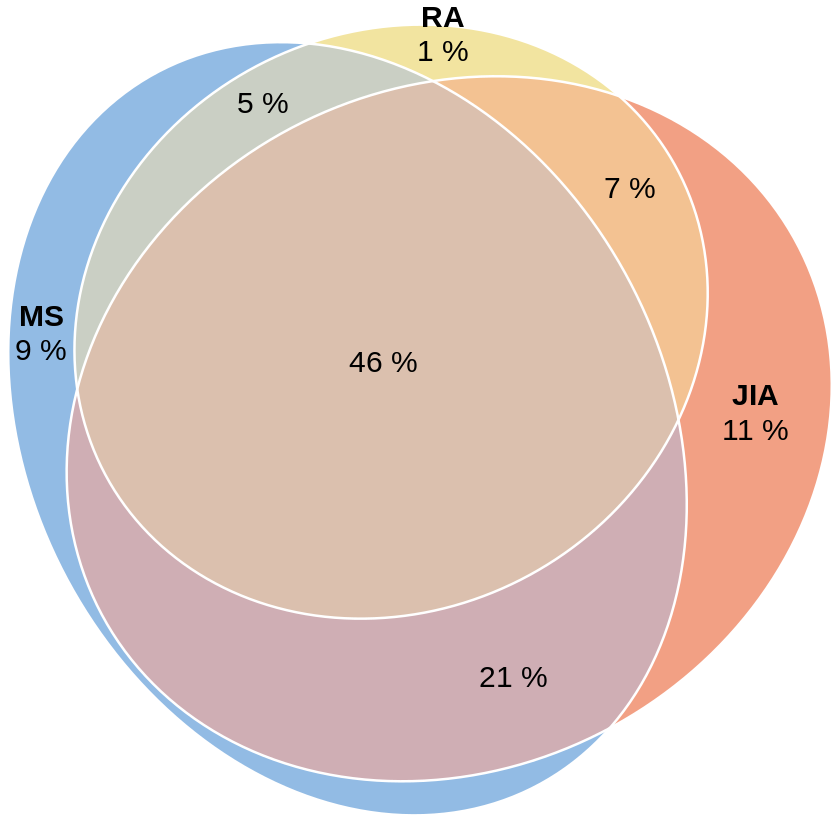

In [22]:
# Show, don't plot
plot(fit,
     fills = list(fill=colors, alpha=0.8),
     labels = list(labels=labels, col="black", fontsize=18),
     edges = list(col="white", lex=2),
     quantities = list(type="percent", fontsize=18))

In [78]:
# Plot
png(filename=outf)
plot(fit,
     fills = list(fill=colors, alpha=1),
     labels = list(labels=labels, col="black", fontsize=18),
     edges = list(col="white", lex=2),
     quantities = list(type="percent", fontsize=18))
dev.off()

png 
  2

In [39]:
fname <- "figures/sa_adhd_gge.parameters.csv"
labels <- c("SA", "ADHD", "GGE")
outf <- "figures/scz_adhd_bip.parameters.euler.png"
colors <- c("#44BB99", "#EE8866", "#EEDD88")
# #77AADD SCZ
# #EE8866 ADHD
# #EEDD88 GGE
# #FFAABB COG
# #99DDFF TH
# #44BB99 SA
# #BBCC33 AUD
# #AAAA00 MIG
# #DDDDDD BMI Height GAD BIP MDD
df <- fread(fname)
print(dim(df))
i_best_run = which.min(df$rank_p_proportion_deviation_from_median)
print(paste(i_best_run, "is the best run."))
best = df[i_best_run]
acceptable_negative_gap = -1E-10
p1 <- best$p_1 - best$p_12 - best$p_13 + best$p_123
if (p1<0 & p1>acceptable_negative_gap) {p1 <- 0}
p2 <- best$p_2 - best$p_12 - best$p_23 + best$p_123
if (p2<0 & p2>acceptable_negative_gap) {p2 <- 0}
p3 <- best$p_3 - best$p_13 - best$p_23 + best$p_123
if (p3<0 & p3>acceptable_negative_gap) {p3 <- 0}
p12 <- best$p_12 - best$p_123
if (p12<0 & p12>acceptable_negative_gap) {p12 <- 0}
p13 <- best$p_13 - best$p_123
if (p13<0 & p13>acceptable_negative_gap) {p13 <- 0}
p23 <- best$p_23 - best$p_123
if (p23<0 & p23>acceptable_negative_gap) {p23 <- 0}
p123 <- best$p_123
if (p123<0 & p1>acceptable_negative_gap) {p123 <- 0}
print(p1)
print(p2)
print(p3)
print(p12)
print(p13)
print(p23)
print(p123)
vec2plot = c("1"=p1,"2"=p2,"3"=p3,"1&2"=p12,"1&3"=p13,"2&3"=p23,"1&2&3"=p123)

[1] 12 28
[1] "4 is the best run."
[1] 0.000267451
[1] 0.0005862418
[1] 0.0005576754
[1] 0
[1] 1.809421e-05
[1] 0.0003033458
[1] 0.0002211343


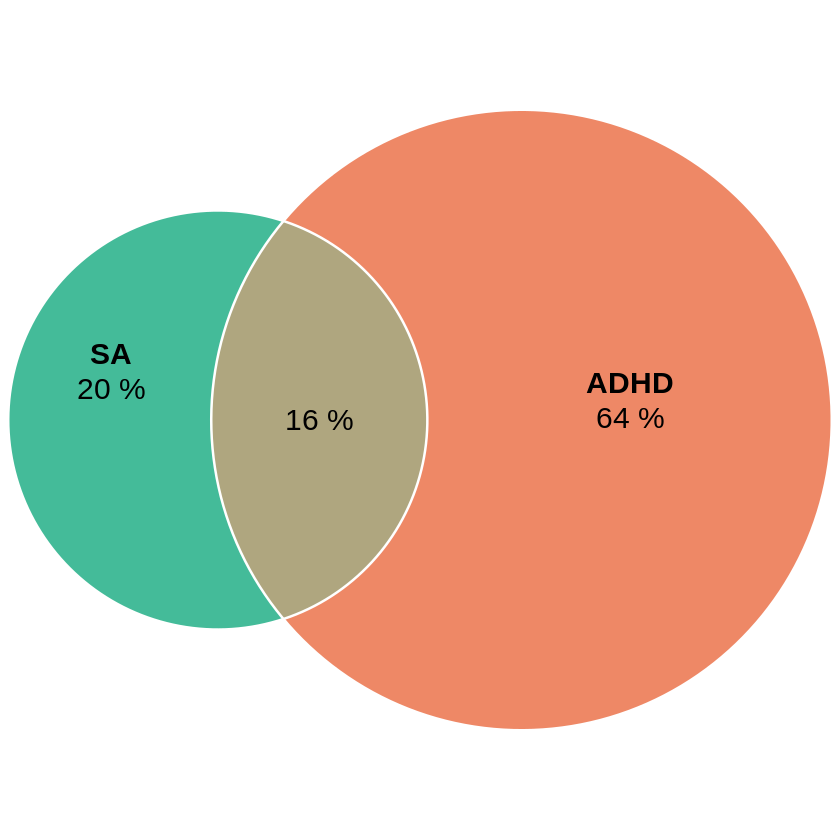

In [42]:
plot(euler(c("1"=best$p_1, "2"=best$p_2, "1&2"=best$p_12), input="union"),
     fills = list(fill=colors[c(1,2)], alpha=1),
     labels = list(labels=labels[c(1,2)], col="black", fontsize=18),
     edges = list(col="white", lex=2),
     quantities = list(type="percent", fontsize=18))

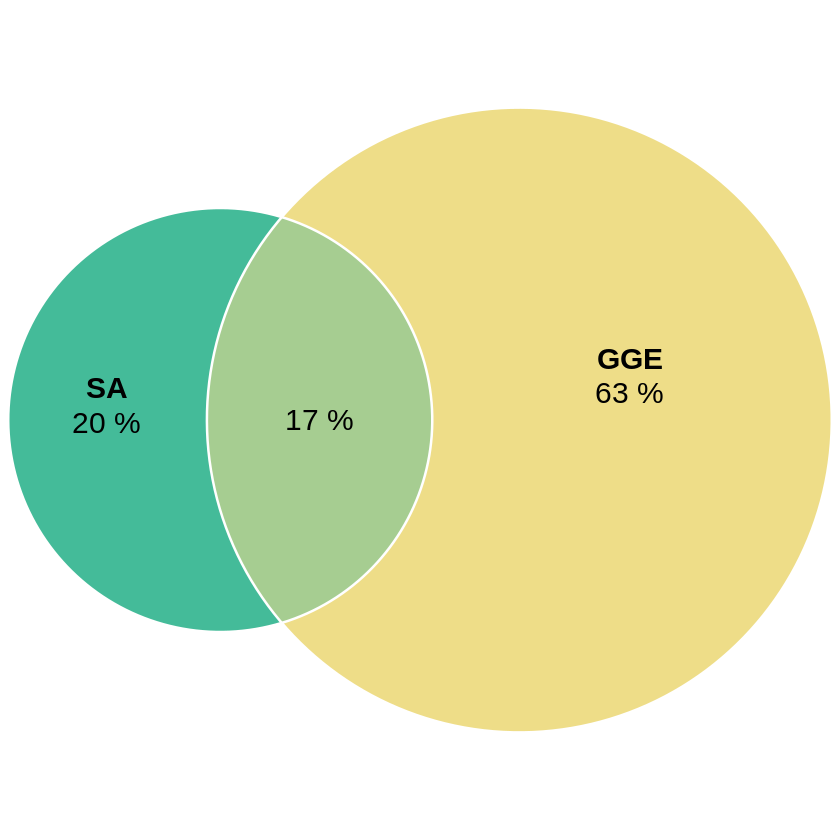

In [43]:
plot(euler(c("1"=best$p_1, "3"=best$p_3, "1&3"=best$p_13), input="union"),
     fills = list(fill=colors[c(1,3)], alpha=1),
     labels = list(labels=labels[c(1,3)], col="black", fontsize=18),
     edges = list(col="white", lex=2),
     quantities = list(type="percent", fontsize=18))

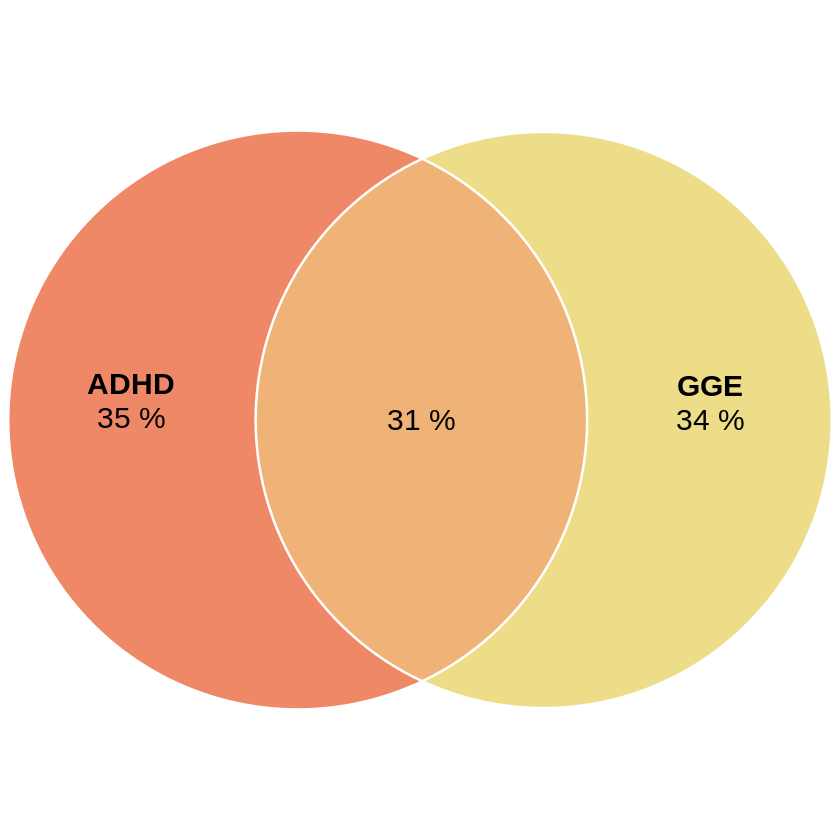

In [44]:
plot(euler(c("2"=best$p_2, "3"=best$p_3, "2&3"=best$p_23), input="union"),
     fills = list(fill=colors[c(2,3)], alpha=1),
     labels = list(labels=labels[c(2,3)], col="black", fontsize=18),
     edges = list(col="white", lex=2),
     quantities = list(type="percent", fontsize=18))

In [10]:
best

run_id,p_1,sb2_1,s02_1,success_1,p_2,sb2_2,s02_2,success_2,p_3,⋯,rho_13,rho0_13,success_13,p_23,rho_23,rho0_23,success_23,p_123,success_123,rank_p_proportion_deviation_from_median
<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,⋯,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<lgl>,<dbl>
export/mix3r_export_bdbiobank_bdclinical_bdselfreport_230907/bdbiobank_bdclinical_bdselfreport_aug22_15.json,0.002316412,1.501398e-05,1.016846,TRUE,0.00338275,4.802223e-05,1.048159,TRUE,0.004683908,⋯,0.7917527,0.02798799,TRUE,0.001226278,1,0.03727995,TRUE,0.001524666,TRUE,1


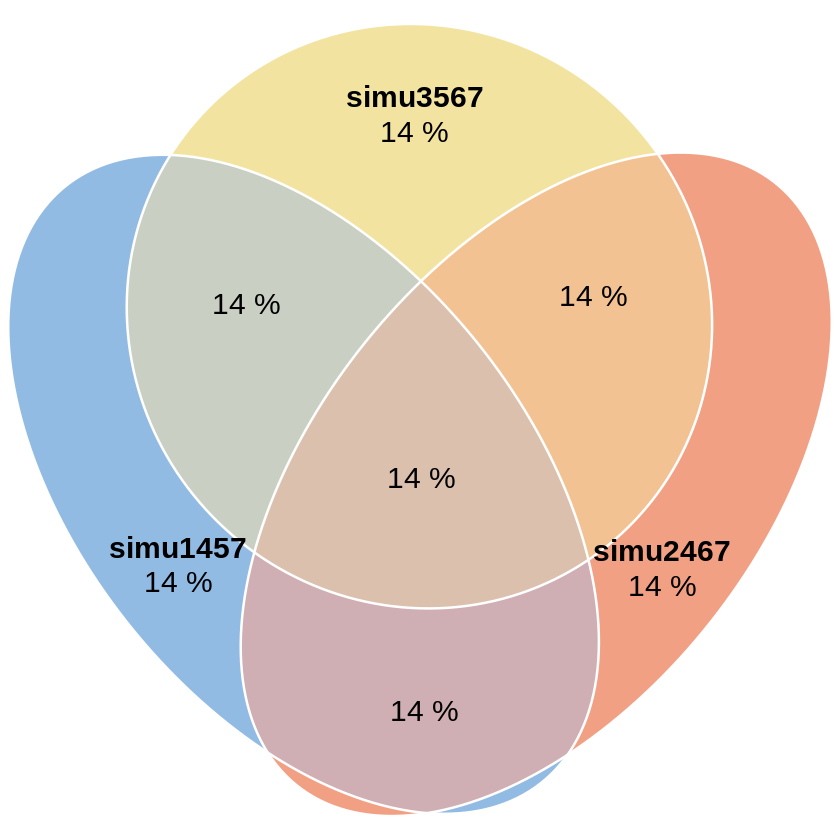

In [15]:
vec2plot = c("1"=4,"2"=4,"3"=4,"1&2"=2,"1&3"=2,"2&3"=2,"1&2&3"=1)
fit <- euler(vec2plot, input="union", shape="ellipse")
# Show, don't plot
plot(fit,
     fills = list(fill=colors, alpha=0.8),
     labels = list(labels=labels, col="black", fontsize=18),
     edges = list(col="white", lex=2),
     quantities = list(type="percent", fontsize=18))

In [13]:
best$p_1; best$p_2; best$p_3

[1] 0.0007052332

[1] 0.0006902305

[1] 0.0008460849